<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/22_02_08_Dacon_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install catboost
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

In [533]:
dataset_path='/content/drive/MyDrive/Dacon/air/'

train_dataset = pd.read_csv(dataset_path+'train.csv').drop(['id'],axis=1)
test_dataset = pd.read_csv(dataset_path+'test.csv').drop(['id'],axis=1)
test_id=pd.read_csv(dataset_path+'test.csv')['id']

In [534]:
train_dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [535]:
test_dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


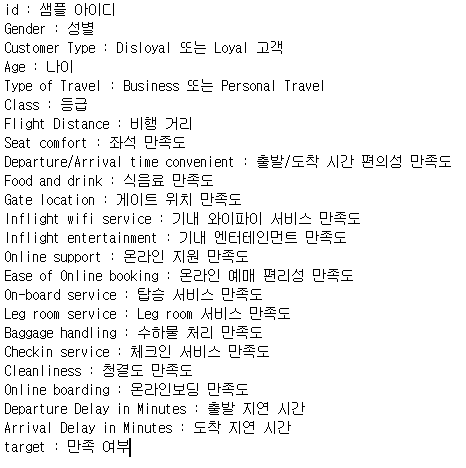

In [536]:
print(train_dataset.info())
print(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [537]:
numeric_feature = train_dataset.columns[(train_dataset.dtypes==int) | (train_dataset.dtypes== float)]
categorical_feature = train_dataset.columns[train_dataset.dtypes=='O']

In [538]:
print(train_dataset['target'].value_counts())

1    1668
0    1332
Name: target, dtype: int64


In [539]:
for i in categorical_feature:
  print('\n')
  print(train_dataset[i].value_counts())



Male      1502
Female    1498
Name: Gender, dtype: int64


Loyal Customer       2489
disloyal Customer     511
Name: Customer Type, dtype: int64


Business travel    2053
Personal Travel     947
Name: Type of Travel, dtype: int64


Business    1434
Eco         1337
Eco Plus     229
Name: Class, dtype: int64


In [540]:
for i in categorical_feature:
  print('\n')
  print(test_dataset[i].value_counts())



Female    1011
Male       989
Name: Gender, dtype: int64


Loyal Customer       1614
disloyal Customer     386
Name: Customer Type, dtype: int64


Business travel    1376
Personal Travel     624
Name: Type of Travel, dtype: int64


Business    976
Eco         861
Eco Plus    163
Name: Class, dtype: int64


In [541]:
print(numeric_feature)

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')


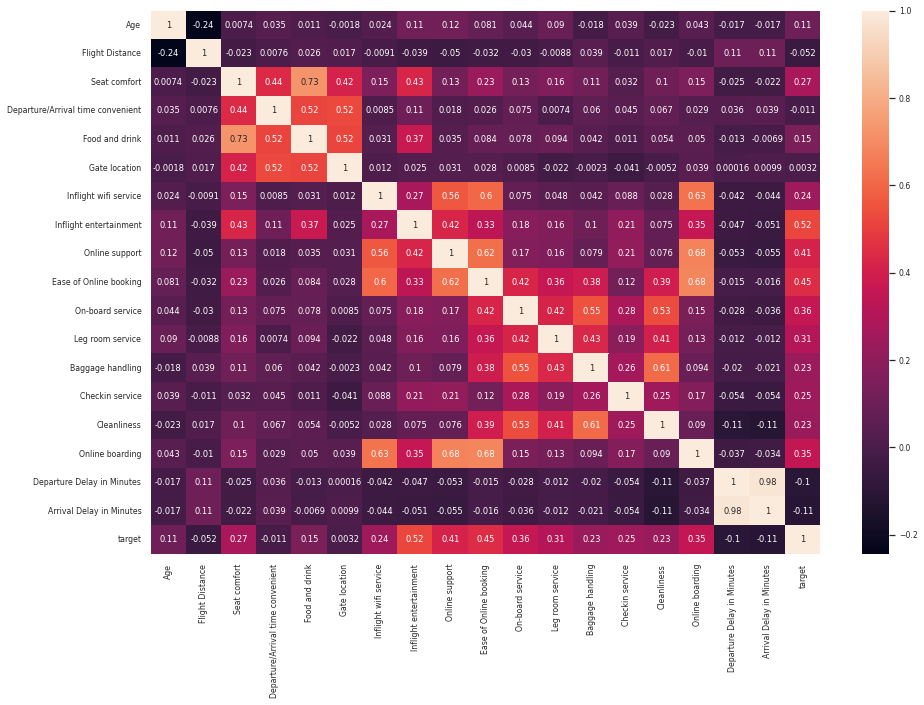

In [542]:
tr_cr=train_dataset
plt.figure(figsize=(15,10))
sns.set(font_scale = 0.7)
ax = sns.heatmap(tr_cr[numeric_feature].corr(), annot=True)
plt.show()

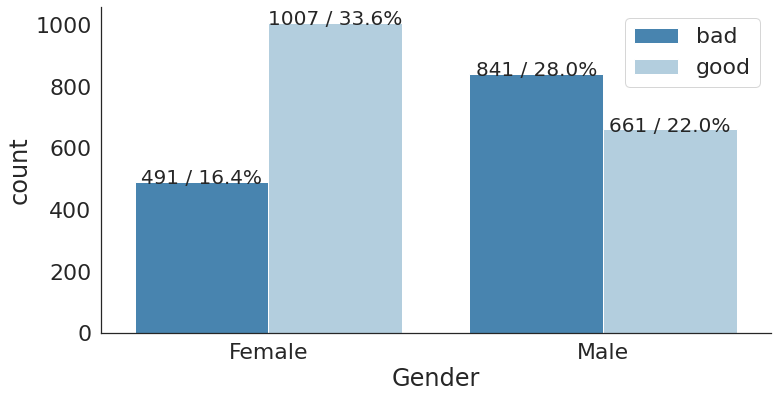

In [543]:
labels = ['bad','good']

total_cnt = train_dataset['target'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=train_dataset, x='Gender',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

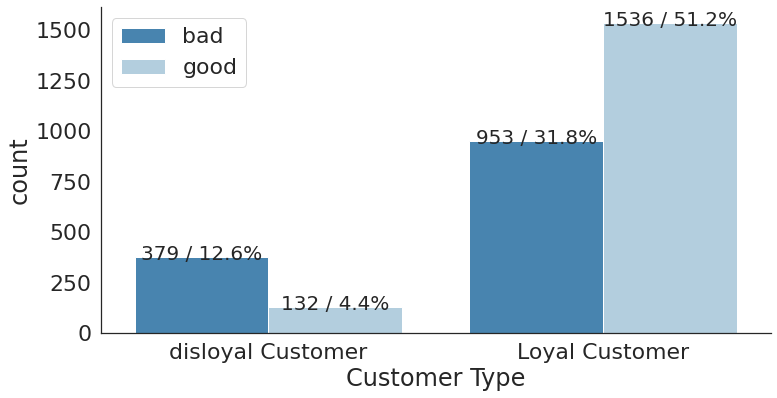

In [544]:
labels = ['bad','good']

total_cnt = train_dataset['target'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=train_dataset, x='Customer Type',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

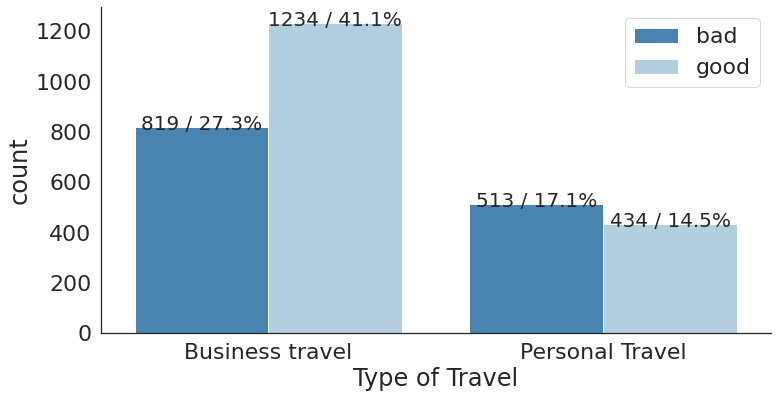

In [545]:
labels = ['bad','good']

total_cnt = train_dataset['target'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=train_dataset, x='Type of Travel',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

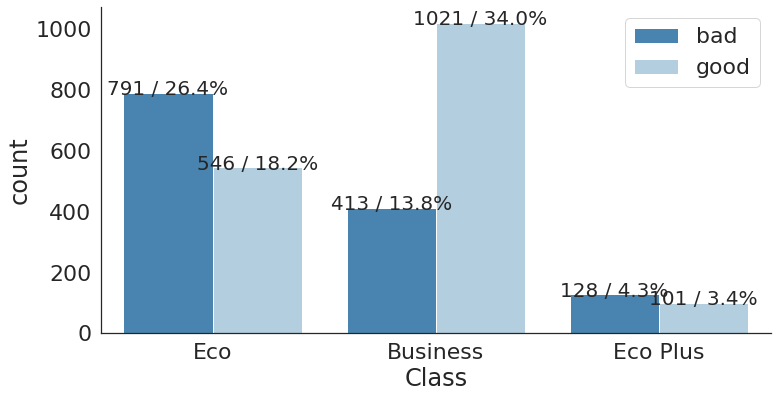

In [546]:
labels = ['bad','good']

total_cnt = train_dataset['target'].count()
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=train_dataset, x='Class',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

In [547]:
def encod(x) :
  Gender_mapping = {'Female':1, 'Male':2}
  Customer_mapping = {'disloyal Customer':10, 'Loyal Customer':11}
  Travel_mapping = {'Business travel':15,'Personal Travel':16}
  x['Gender'] = x['Gender'].map(Gender_mapping)
  x['Customer Type'] = x['Customer Type'].map(Customer_mapping)
  x['Type of Travel'] = x['Type of Travel'].map(Travel_mapping)
  return x

train_dataset=encod(train_dataset)
test_dataset=encod(test_dataset)


In [548]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_class = ohe.fit_transform(train_dataset[['Class']])
train_class=pd.DataFrame(train_class)
train_class.columns=['Business','Eco','EcoPlus']

test_class = ohe.transform(test_dataset[['Class']])
test_class=pd.DataFrame(test_class)
test_class.columns=['Business','Eco','EcoPlus']

In [549]:
X_train=train_dataset.iloc[:,:-1]
y_train=train_dataset.iloc[:,-1]
X_test=test_dataset

In [550]:
X_train['delay']=(X_train['Departure Delay in Minutes']+X_train['Arrival Delay in Minutes'])/2
X_train=X_train.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes','Class'], axis=1)
X_test['delay']=(X_test['Departure Delay in Minutes']+X_test['Arrival Delay in Minutes'])/2
X_test=X_test.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes','Class'], axis=1)

X_train=pd.concat([X_train, train_class], axis=1)
X_test=pd.concat([X_test, test_class], axis=1)

In [551]:
print(X_train.head())
print(X_test.head())

   Gender  Customer Type  Age  Type of Travel  ...  delay  Business  Eco  EcoPlus
0       1             10   22              15  ...    0.0       0.0  1.0      0.0
1       1             11   37              15  ...   18.0       1.0  0.0      0.0
2       2             11   46              15  ...    0.0       1.0  0.0      0.0
3       1             10   24              15  ...    6.0       0.0  1.0      0.0
4       1             11   58              15  ...    0.0       1.0  0.0      0.0

[5 rows x 23 columns]
   Gender  Customer Type  Age  Type of Travel  ...  delay  Business  Eco  EcoPlus
0       1             11   61              16  ...   54.5       0.0  1.0      0.0
1       1             10   27              15  ...    0.0       1.0  0.0      0.0
2       1             11   52              15  ...    0.0       1.0  0.0      0.0
3       2             11   54              15  ...    0.0       1.0  0.0      0.0
4       1             11   41              15  ...    0.0       0.0  1.0   

In [552]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [553]:
from catboost.core import CatBoostClassifier
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGBC',XGBClassifier(verbose=False)))
models.append(('CatBC',CatBoostClassifier(max_depth=4, n_estimators=900, silent=True)))
models.append(('LGBMC',LGBMClassifier()))
models.append(('AdaC',AdaBoostClassifier()))
results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train
                               ,y_train
                               ,cv= kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : 0.840000 (0.018074) 
LDA : 0.838000 (0.019562) 
KNN : 0.872000 (0.020122) 
CART : 0.872000 (0.020774) 
NB : 0.822667 (0.021124) 
SVM : 0.888667 (0.021092) 
RFC : 0.923333 (0.009661) 
XGBC : 0.907000 (0.009123) 
CatBC : 0.925333 (0.008192) 
LGBMC : 0.927000 (0.010796) 
AdaC : 0.893333 (0.014832) 


In [554]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier(max_depth=7, n_estimators=200)
catc=CatBoostClassifier(max_depth=4, n_estimators=900, silent=True)
lgbmc=LGBMClassifier()

vo_clf = VotingClassifier(estimators=[('RFC', rfc), ('CATC', catc), ('LGBMC', lgbmc)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
pred=pd.DataFrame(pred)

In [555]:
sub=pd.concat([test_id, pred], axis=1)
sub.columns=['id','target']
print(sub)

sub.to_csv('02_08_air_3.csv', index=False)

        id  target
0        1       1
1        2       0
2        3       1
3        4       1
4        5       1
...    ...     ...
1995  1996       0
1996  1997       1
1997  1998       0
1998  1999       1
1999  2000       1

[2000 rows x 2 columns]
